# Sentinel-1 data download

In [48]:
import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter
from pathlib import Path
from datetime import date
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt


print('All libraries successfully imported!')
print(f'sentinelsat : {sentinelsat.__version__}')

All libraries successfully imported!
sentinelsat : 1.1.0


## Set directory

In [49]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_letter    = 'X'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/'

roi_path = f'{work_path}ROI/'
dwl_path = f'{work_path}DOWNLOAD/'

Path(dwl_path).mkdir(parents=True, exist_ok=True)

## Authentification to Copernicus Open Access Hub

The Copernicus Open Access Hub and probably most Data Hubs require authentication.

You can provide your credentials with **SentinelAPI(your username , your password)**

In [50]:
user     = 'ndeffense'
password = 'lbrat2104'

# Connect to the API
api = SentinelAPI(user, password, 'https://apihub.copernicus.eu/apihub')

## Set region of interest

### 1. Open ROI shapefile

In [51]:
crs_dst = 'EPSG:32631'

roi_name     = 'extent_roi'
roi_filename = f'{roi_name}_{crs_dst[5:]}.shp'
roi_file     = f'{roi_path}{roi_filename}'

roi_gdf = gpd.read_file(roi_file)

print(f'ROI shapefile : {roi_file}')

ROI shapefile : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/ROI/extent_roi_32631.shp


### 2. Reproject to WGS 84 if necessary


In [52]:
if roi_gdf.crs != 'epsg:4326':
    print(f'Old CRS : {roi_gdf.crs}')
    
    roi_gdf = roi_gdf.to_crs('epsg:4326')

    print((f'New CRS : {roi_gdf.crs}'))

Old CRS : epsg:32631
New CRS : epsg:4326


### 3. Save ROI (WGS 84) as GeoJSON file


In [53]:
roi_file_json = f'{roi_path}{roi_name}_4326.geojson'

roi_gdf.to_file(roi_file_json, driver='GeoJSON')

print(f'ROI GeoJSON file : {roi_file_json}')

ROI GeoJSON file : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/ROI/extent_roi_4326.geojson


### 4. Set footprint

In [54]:
footprint = geojson_to_wkt(read_geojson(roi_file_json))

footprint

'GEOMETRYCOLLECTION(POLYGON((4.7927 50.4526,4.7946 50.5037,4.9335 50.5015,4.9314 50.4503,4.7927 50.4526)))'

## Set period of interest

In [55]:
# Year, Month, Day

start_date = date(2021, 10, 1)
end_date   = date(2021, 11, 30)

period = (start_date, end_date)

period

(datetime.date(2021, 10, 1), datetime.date(2021, 11, 30))

## Set product type

In [56]:
#product_type = 'GRD'
product_type = 'SLC'

## Set orbit direction

In [57]:
#orbit_direction = 'ASCENDING'
orbit_direction = None

## Search by polygon, time, and SciHub query keywords

In [65]:
products = api.query(footprint,
                     date = period,
                     platformname = 'Sentinel-1',
                     producttype = product_type,
                     orbitdirection = orbit_direction,
                     limit = 10)

# Convert to pandas DataFrame

gdf = api.to_geodataframe(products)

display(gdf.head())

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,producttype,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,uuid,geometry
b1b3feaf-7789-4d72-b7e0-54daf9526dce,S1A_IW_SLC__1SDV_20211129T055902_20211129T0559...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-29T05:59:02.914Z, Instrument: SA...",false,2021-11-29 05:59:02.914,2021-11-29 05:59:30.012,2021-11-29 07:18:32.892,317244,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,b1b3feaf-7789-4d72-b7e0-54daf9526dce,"MULTIPOLYGON (((4.98045 49.45272, 5.49601 51.0..."
c666ef35-b132-46d5-8ed6-bb7ef9904248,S1A_IW_SLC__1SDV_20211127T172456_20211127T1725...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-27T17:24:56.24Z, Instrument: SAR...",false,2021-11-27 17:24:56.240,2021-11-27 17:25:23.318,2021-11-27 18:48:49.874,317038,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,c666ef35-b132-46d5-8ed6-bb7ef9904248,"MULTIPOLYGON (((4.45775 49.85886, 8.02799 50.2..."
a3093df0-72d5-4205-b88e-de79ab053b27,S1B_IW_SLC__1SDV_20211126T173211_20211126T1732...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-26T17:32:11.441Z, Instrument: SA...",false,2021-11-26 17:32:11.441,2021-11-26 17:32:38.418,2021-11-26 18:48:46.008,232802,...,SLC,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,a3093df0-72d5-4205-b88e-de79ab053b27,"MULTIPOLYGON (((2.72885 48.86291, 6.21426 49.2..."
29686869-fc46-47a8-8cf4-167161387a22,S1A_IW_SLC__1SDV_20211124T055054_20211124T0551...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-24T05:50:54.177Z, Instrument: SA...",false,2021-11-24 05:50:54.177,2021-11-24 05:51:21.273,2021-11-24 08:01:24.803,316591,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,29686869-fc46-47a8-8cf4-167161387a22,"MULTIPOLYGON (((6.94221 49.16781, 7.45346 50.7..."
536bf3ce-542a-4614-889a-69d17553b5a9,S1B_IW_SLC__1SDV_20211123T055807_20211123T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-23T05:58:07.534Z, Instrument: SA...",false,2021-11-23 05:58:07.534,2021-11-23 05:58:34.635,2021-11-23 07:45:44.449,232412,...,SLC,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,536bf3ce-542a-4614-889a-69d17553b5a9,"MULTIPOLYGON (((5.26505 50.27451, 5.79374 51.8..."


In [66]:
orbit_list = gdf['relativeorbitnumber'].drop_duplicates().to_list()

print(f'Relative orbit number : {orbit_list}')

Relative orbit number : [110, 88, 161, 37]


## Plot footprint of the products

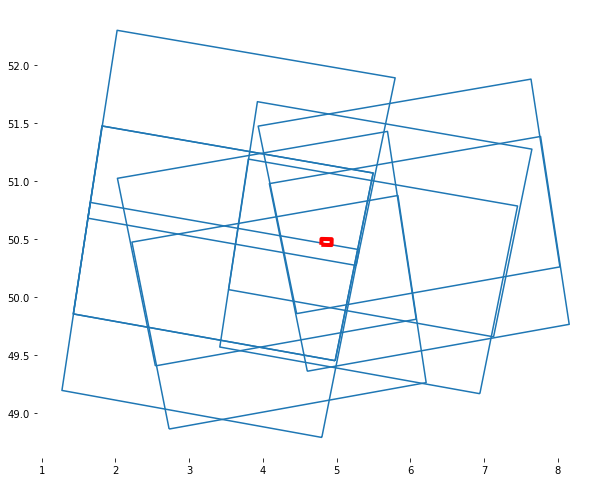

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

gdf.boundary.plot(ax=ax)

roi_gdf.boundary.plot(color='red', linewidth = 4, ax=ax)

plt.box(False)

## Download products

Copernicus Open Access Hub no longer stores all products online for immediate retrieval. Offline products can be requested from the Long Term Archive (LTA) and should become available within 24 hours. Copernicus Open Access Hub’s quota currently permits users to request an offline product every 30 minutes.

A product’s availability can be checked by using the `is_online()` convenience method.

The retrieval of offline products from the LTA can be triggered using trigger_offline_retrieval().

### Define the filter function to select files (to be excluded in this case)


In [60]:
#path_filter = make_path_filter("*s1?-ew[12]-slc-hh-*.tiff")
path_filter = None

In [61]:
for i, row in gdf[0:1].iterrows():

    product_id = row['uuid']

    is_online = api.is_online(product_id)

    if is_online:
        print(f'Product {product_id} is online. Starting download.')
        #api.download(product_id, directory_path=dwl_path, nodefilter=path_filter)
    else:
        print(f'Product {product_id} is not online.')
        api.trigger_offline_retrieval(product_id)


Product b1b3feaf-7789-4d72-b7e0-54daf9526dce is online. Starting download.
